In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
from google.colab import drive
drive .mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv("/content/drive/MyDrive/electricity.csv")
data.head()

<ipython-input-3-4eeec7149ce6>:1: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("/content/drive/MyDrive/electricity.csv")


,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01-11-2011 00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6,9.3,600.71,356,3159.6,54.32
1,01-11-2011 00:30,None,0,1,44,1,11,2011,1,321.8,3196.66,49.26,6,11.1,605.42,317,2973.01,54.23
2,01-11-2011 01:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.1,5,11.1,589.97,311,2834,54.23
3,01-11-2011 01:30,None,0,1,44,1,11,2011,3,335.6,2945.56,48.04,6,9.3,585.94,313,2725.99,53.47
4,01-11-2011 02:00,None,0,1,44,1,11,2011,4,342.9,2849.34,33.75,6,11.1,571.52,346,2655.64,39.87


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 38014 non-null  object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [5]:
#convert these string values to float values
data["ForecastWindProduction"] = pd.to_numeric(data["ForecastWindProduction"], errors= 'coerce')
data["SystemLoadEA"] = pd.to_numeric(data["SystemLoadEA"], errors= 'coerce')
data["SMPEA"] = pd.to_numeric(data["SMPEA"], errors= 'coerce')
data["ORKTemperature"] = pd.to_numeric(data["ORKTemperature"], errors= 'coerce')
data["ORKWindspeed"] = pd.to_numeric(data["ORKWindspeed"], errors= 'coerce')
data["CO2Intensity"] = pd.to_numeric(data["CO2Intensity"], errors= 'coerce')
data["ActualWindProduction"] = pd.to_numeric(data["ActualWindProduction"], errors= 'coerce')
data["SystemLoadEP2"] = pd.to_numeric(data["SystemLoadEP2"], errors= 'coerce')
data["SMPEP2"] = pd.to_numeric(data["SMPEP2"], errors= 'coerce')

In [6]:
data.isnull().sum()
#No of null values for each feature

DateTime                    0
Holiday                     0
HolidayFlag                 0
DayOfWeek                   0
WeekOfYear                  0
Day                         0
Month                       0
Year                        0
PeriodOfDay                 0
ForecastWindProduction      5
SystemLoadEA                2
SMPEA                       2
ORKTemperature            295
ORKWindspeed              299
CO2Intensity                7
ActualWindProduction        5
SystemLoadEP2               2
SMPEP2                      2
dtype: int64

In [7]:
data = data.dropna()

In [8]:
data.isnull().sum()

DateTime                  0
Holiday                   0
HolidayFlag               0
DayOfWeek                 0
WeekOfYear                0
Day                       0
Month                     0
Year                      0
PeriodOfDay               0
ForecastWindProduction    0
SystemLoadEA              0
SMPEA                     0
ORKTemperature            0
ORKWindspeed              0
CO2Intensity              0
ActualWindProduction      0
SystemLoadEP2             0
SMPEP2                    0
dtype: int64

<ipython-input-10-7d107cef7906>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr(method='pearson')


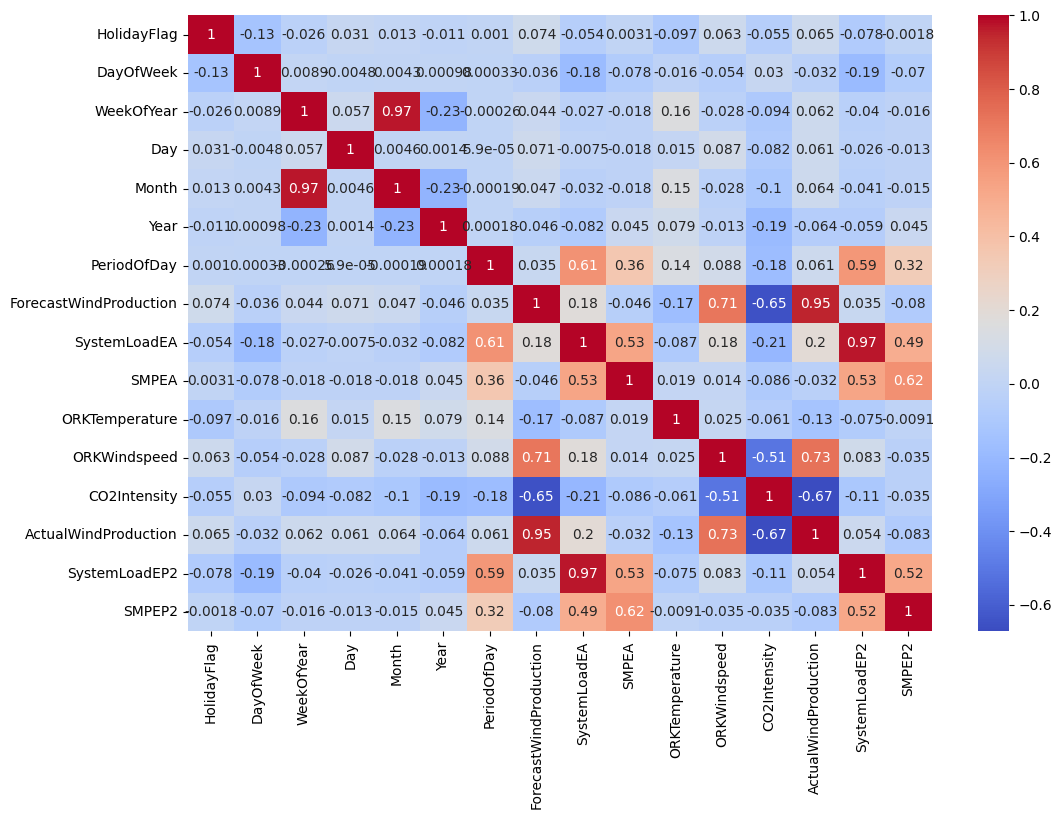

In [10]:
##the correlation between all the columns in the dataset
import seaborn as sns
#import matplotlib.pyplot as plt
correlations = data.corr(method='pearson')
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [11]:
x = data[["Day", "Month", "ForecastWindProduction", "SystemLoadEA",
          "SMPEA", "ORKTemperature", "ORKWindspeed", "CO2Intensity",
          "ActualWindProduction", "SystemLoadEP2"]]
y = data["SMPEP2"]

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.2,random_state=42)

In [13]:
print('Shape of x_new training set {}'.format(xtrain.shape),'&',' Size of Y training set {}'.format(ytrain.shape))

Shape of x_new training set (30145, 10) &  Size of Y training set (30145,)


In [14]:
print('Shape of X_new testing set {}'.format(xtest.shape),'&',' Size of Y testing set {}'.format(ytest.shape))

Shape of X_new testing set (7537, 10) &  Size of Y testing set (7537,)


In [15]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(xtrain, ytrain)

RandomForestRegressor()

In [16]:
yp=model.predict(xtest)

In [17]:
yp

array([45.6728, 56.3535, 71.4572, ..., 40.5311, 60.8689, 39.6888])

In [18]:
x = xtest
y = ytest
print("Residual sum of squares: %.2f"
      % np.mean((yp - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model.score(x, y))

Residual sum of squares: 595.33
Variance score: 0.54


In [19]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
metrics.mean_absolute_error(y, yp)

9.362168435717129

In [20]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
metrics.mean_squared_error(y, yp)

595.3346537927836

In [22]:
features = np.array([[10, 12, 54.10, 4241.05, 49.56, 9.0, 14.8, 491.32, 54.0, 4426.84]])
model.predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([66.9997])